# Import Liabraries

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

#Import Dataset

In [3]:
netflix=pd.read_csv('/content/dataset - netflix1.csv')

# Data Understanding

In [4]:
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [16]:
netflix.shape

(8790, 10)

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [17]:
netflix.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
netflix.isna().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [12]:
netflix.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8785    False
8786    False
8787    False
8788    False
8789    False
Length: 8790, dtype: bool

# Correcting the date format

In [27]:
netflix['date_added']=pd.to_datetime(netflix['date_added'],errors ='coerce')
netflix['date_added']= netflix['date_added'].dt.strftime('%d/%m/%y')

In [28]:
missed_dates = netflix['date_added'].isnull().sum()
duration = lambda duration : int(''.join(filter(str.isdigit, duration)))

In [29]:
netflix['duration']= netflix['duration'].apply(duration)

In [31]:
netflix.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,25/09/21,2020,PG-13,90,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,24/09/21,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,24/09/21,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,22/09/21,2021,TV-PG,91,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,24/09/21,1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,24/09/21,2021,TV-14,9,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,24/09/21,2021,PG-13,104,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,05/01/21,2019,TV-Y7,87,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,23/09/21,2021,TV-MA,127,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,05/01/21,2013,TV-Y7,76,"Children & Family Movies, Music & Musicals"


<Axes: >

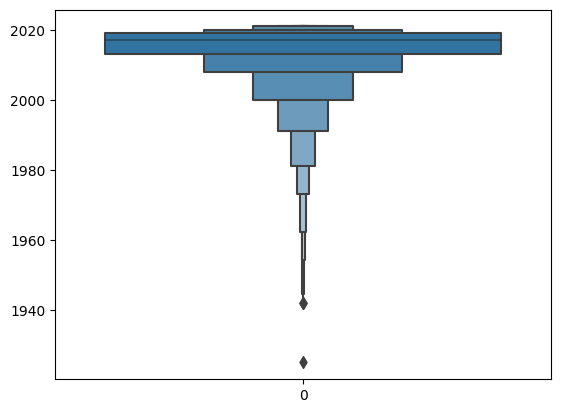

In [34]:
sns.boxenplot(netflix['release_year'])

<Axes: xlabel='release_year', ylabel='Count'>

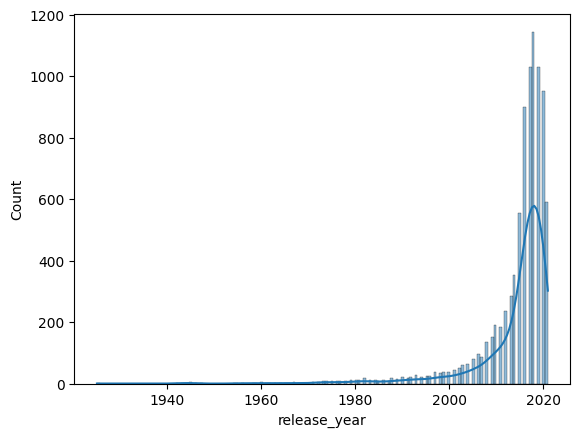

In [37]:
sns.histplot(x=netflix['release_year'],kde=True)

In [38]:
netflix.drop('show_id',axis = 1,inplace = True)

In [39]:
netflix.head(5)

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,25/09/21,2020,PG-13,90,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,24/09/21,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,24/09/21,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,22/09/21,2021,TV-PG,91,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,24/09/21,1993,TV-MA,125,"Dramas, Independent Movies, International Movies"


In [40]:
netflix['release_year'].describe()

count    8790.000000
mean     2014.183163
std         8.825466
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [46]:
percentile25=netflix["release_year"].quantile(0.25)
percentile75=netflix["release_year"].quantile(0.75)
print("25 percentile is",percentile25)
print("75 percentile is",percentile75)

25 percentile is 2013.0
75 percentile is 2019.0


In [47]:
IQR = percentile75-percentile25
print("inter Quartile Range is ", IQR)

inter Quartile Range is  6.0


In [51]:
UL = percentile75 + 1.5*IQR
LL = percentile25 - 1.5*IQR
print("upper_limit - ",UL)
print("lower_limit - ",LL)

upper_limit -  2028.0
lower_limit -  2004.0


In [54]:
netflix[netflix["release_year"]>UL]

,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [55]:
netflix[netflix["release_year"]>LL]

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,25/09/21,2020,PG-13,90,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,24/09/21,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,24/09/21,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,22/09/21,2021,TV-PG,91,"Children & Family Movies, Comedies"
5,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,24/09/21,2021,TV-14,9,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Not Given,Turkey,17/01/17,2016,TV-PG,2,"International TV Shows, TV Dramas"
8786,TV Show,Zak Storm,Not Given,United States,13/09/18,2016,TV-Y7,3,Kids' TV
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,15/12/16,2012,TV-PG,1,"International TV Shows, Romantic TV Shows, TV ..."
8788,TV Show,Yoko,Not Given,Pakistan,23/06/18,2016,TV-Y,1,Kids' TV


In [61]:
netflix2 = netflix[netflix["release_year"]>lower_limit]

In [62]:
netflix2.shape

(8009, 9)

<Axes: xlabel='release_year'>

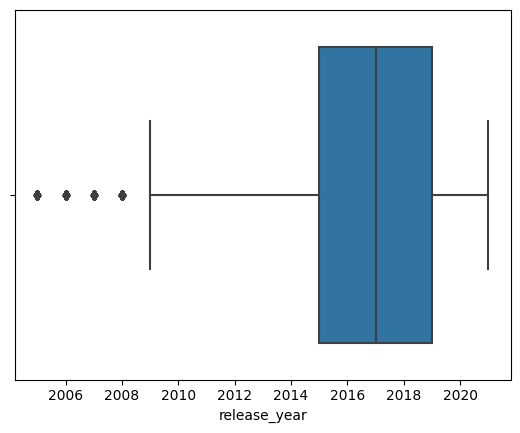

In [63]:
sns.boxplot(x=netflix2['release_year'])

<Axes: xlabel='release_year', ylabel='Count'>

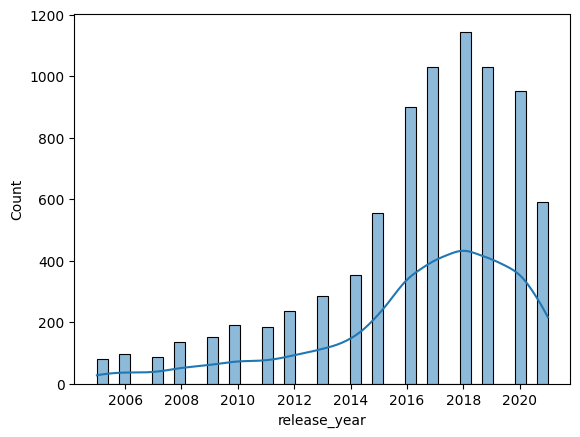

In [64]:
sns.histplot(x=netflix2['release_year'],kde=True)

In [65]:
netflix2['release_year'].describe()

count    8009.000000
mean     2016.408291
std         3.637256
min      2005.000000
25%      2015.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [66]:
per25=netflix2['release_year'].quantile(0.25)
per75=netflix2['release_year'].quantile(0.75)
print('25 percentile is', per25)
print('75 percentile is', per75)

25 percentile is 2015.0
75 percentile is 2019.0


In [68]:
IQR=per75-per25
IQR

4.0

In [77]:
ul = percentile75 + 1.5*IQR
ll = percentile25 - 1.5*IQR
print('upper_limit is',ul)
print("lower_limit is", ll)

upper_limit is 2025.0
lower_limit is 2007.0


In [72]:
netflix2[netflix2["release_year"]>ul]

,type,title,director,country,date_added,release_year,rating,duration,listed_in


In [76]:
netflix2[netflix2["release_year"]<ll]

,type,title,director,country,date_added,release_year,rating,duration,listed_in
86,Movie,Naruto the Movie 2: Legend of the Stone of Gelel,Hirotsugu Kawasaki,Japan,15/09/21,2005,TV-PG,97,"Action & Adventure, Anime Features, Internatio..."
87,Movie,Naruto the Movie 3: Guardians of the Crescent ...,Toshiyuki Tsuru,Japan,15/09/21,2006,TV-PG,95,"Action & Adventure, Anime Features, Internatio..."
181,Movie,An Unfinished Life,Lasse Hallström,Germany,09/01/21,2005,PG-13,108,Dramas
212,Movie,Initial D,"Andrew Lau Wai-keung, Alan Mak",China,09/01/21,2005,TV-14,109,"Action & Adventure, International Movies"
230,Movie,Poseidon,Wolfgang Petersen,United States,09/01/21,2006,PG-13,98,"Action & Adventure, Dramas"
...,...,...,...,...,...,...,...,...,...
8618,TV Show,Power Rangers Mystic Force,Not Given,United States,01/01/16,2006,TV-Y7,1,Kids' TV
8622,TV Show,Power Rangers S.P.D.,Not Given,United States,01/01/16,2005,TV-Y7,1,Kids' TV
8693,TV Show,That '70s Show,Not Given,United States,11/01/17,2005,TV-14,8,TV Comedies
8736,TV Show,The Real Football Factories,Not Given,United Kingdom,29/12/17,2006,TV-MA,1,"British TV Shows, Docuseries, International TV..."


In [74]:
netflix3 = netflix2[netflix2["release_year"]>ll]

In [75]:
netflix3.shape

(7745, 9)

<Axes: xlabel='release_year'>

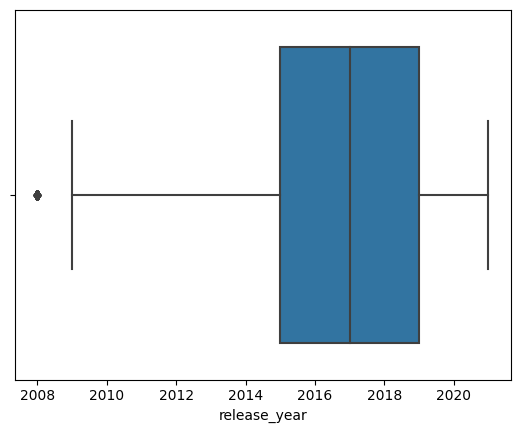

In [78]:
sns.boxplot(x=netflix3['release_year'])

In [79]:
netflix3["release_year"].describe()

count    7745.000000
mean     2016.762040
std         3.140405
min      2008.000000
25%      2015.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [80]:
upper_limit = 2019.0 + 1.5*3
lower_limit = 2016.0 - 1.5*3
print(upper_limit,"-upper_limit")
print(lower_limit,"-lower_limit")

2023.5 -upper_limit
2011.5 -lower_limit


In [83]:
netflix3[netflix3["release_year"]<lower_limit]

,type,title,director,country,date_added,release_year,rating,duration,listed_in
30,Movie,Grown Ups,Dennis Dugan,United States,20/09/21,2010,PG-13,103,Comedies
81,Movie,Naruto Shippuden the Movie: Blood Prison,Masahiko Murata,Japan,15/09/21,2011,TV-14,102,"Action & Adventure, Anime Features, Internatio..."
82,Movie,Naruto Shippûden the Movie: Bonds,Hajime Kamegaki,Japan,15/09/21,2008,TV-PG,93,"Action & Adventure, Anime Features, Internatio..."
83,Movie,Naruto Shippûden the Movie: The Will of Fire,Masahiko Murata,Japan,15/09/21,2009,TV-PG,96,"Action & Adventure, Anime Features, Internatio..."
85,Movie,Naruto Shippuden: The Movie: The Lost Tower,Masahiko Murata,Japan,15/09/21,2010,TV-14,85,"Action & Adventure, Anime Features, Internatio..."
...,...,...,...,...,...,...,...,...,...
8750,TV Show,The Womanizer,Not Given,China,09/01/16,2010,TV-MA,1,"International TV Shows, Romantic TV Shows, TV ..."
8751,TV Show,The Year of Happiness and Love,Not Given,Taiwan,09/01/16,2009,TV-PG,1,"International TV Shows, Romantic TV Shows, TV ..."
8771,TV Show,Timeless Season,Not Given,Pakistan,18/09/17,2009,TV-14,1,"International TV Shows, TV Dramas"
8774,TV Show,Who's the One,Not Given,Taiwan,01/01/17,2011,TV-14,1,"International TV Shows, Romantic TV Shows, TV ..."


In [84]:
netflix3 = netflix2[netflix2["release_year"]>lower_limit]

In [85]:
netflix3.shape

(7081, 9)

<Axes: xlabel='release_year'>

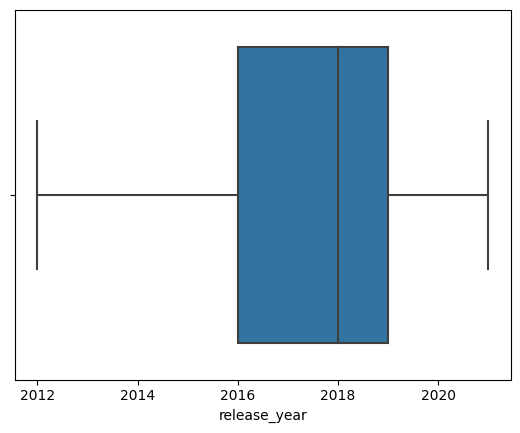

In [86]:
sns.boxplot(x=netflix3['release_year'])

<Axes: xlabel='release_year', ylabel='Count'>

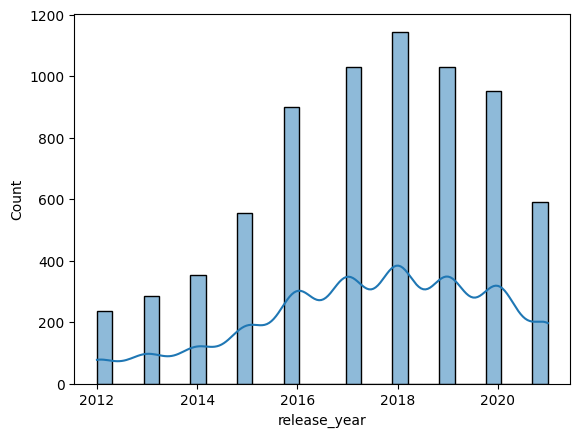

In [87]:
sns.histplot(x=netflix3['release_year'],kde=True)

#Clean data without outliers

In [89]:
netflix3.to_csv(" - netflix.csv")